In [65]:
# dataset
# A
a=[0,0,1,1,0,0,
   0,1,0,0,1,0,
   1,1,1,1,1,1,
   1,0,0,0,0,1,
   1,0,0,0,0,1]
# B
b=[0,1,1,1,1,0,
   0,1,0,0,1,0,
   0,1,1,1,1,0,
   0,1,0,0,1,0,
   0,1,1,1,1,0]

# C
c=[0,1,1,1,1,0,
   0,1,0,0,0,0,
   0,1,0,0,0,0,
   0,1,0,0,0,0,
   0,1,1,1,1,0]


In [66]:
#creating labels
y=[[1,0,0],
   [0,1,0],
   [0,0,1]
   ]

In [67]:
#importing required libraries
import numpy as np
import matplotlib.pyplot as plt

Visulizet the data


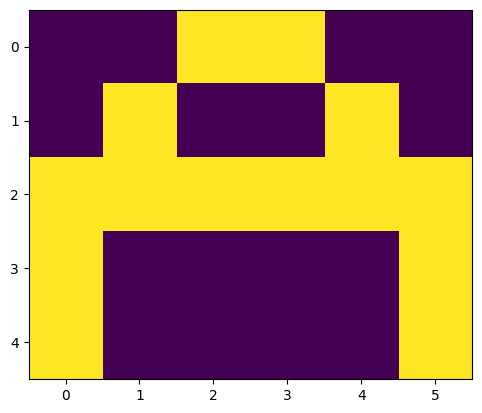

In [68]:
plt.imshow(np.array(a).reshape(5,6))
plt.show()

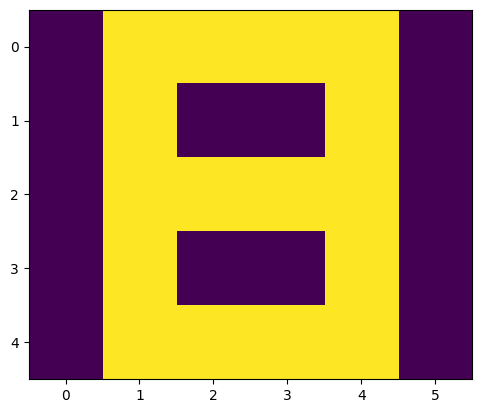

In [69]:
plt.imshow(np.array(b).reshape(5,6))
plt.show()

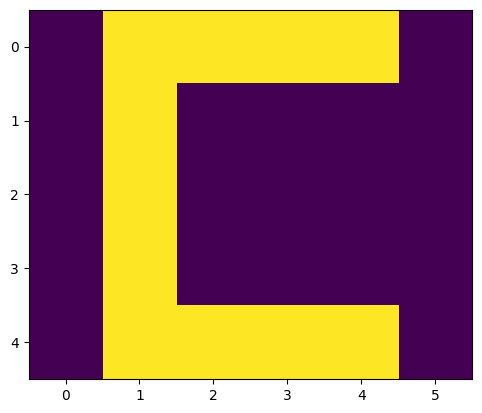

In [70]:
plt.imshow(np.array(c).reshape(5,6))
plt.show()

In [71]:
#converting labels and data into nupy arrays
x=[np.array(a).reshape(1,30),np.array(b).reshape(1,30),np.array(c).reshape(1,30)]
y=np.array(y)
print(x,"\n\n",y)

[array([[0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
        0, 1, 1, 0, 0, 0, 0, 1]]), array([[0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 0]]), array([[0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 1, 1, 1, 1, 0]])] 

 [[1 0 0]
 [0 1 0]
 [0 0 1]]


In [72]:
#activation function
def sigmoid(x):
    return (1/(1+np.exp(-x)))

In [73]:
#create feed forward NN
def f_forward(x,w1,w2):
    z1=x.dot(w1)
    a1=sigmoid(z1)
    #outer layer
    z2=a1.dot(w2)
    a2=sigmoid(z2)
    return a2

In [74]:
# initilize Weights
def generate_wt(x,y):
    l=[]
    for i in range(x*y):
        l.append(np.random.rand())

    return np.array(l).reshape(x,y)

In [75]:
# Loss function Mean square Error
def loss(out,y):
    s=np.square(out-y)
    s=np.sum(s)/len(y)
    return s
    

In [76]:
# Back propagation
def back_prop(x,y,w1,w2,alpha):
    #hidden
    z1=x.dot(w1)
    a1=sigmoid(z1)
    z2=a1.dot(w2)
    a2=sigmoid(z2)
    d2=a2-y
    d1=np.multiply((w2.dot((d2.transpose()))).transpose(),np.multiply(a1,1-a1))
    # gradient
    w1_adj=x.transpose().dot(d1)
    w2_adj=a1.transpose().dot(d2)
    w1=w1-(alpha*w1_adj)
    w2=w2-(alpha*w2_adj)
    
    return w1,w2
    

In [77]:
#Train function
def train(X,Y,w1,w2,alpha=0.01,ephocs=10):
    acc=[]
    los=[]
    for j in range(ephocs):
        l=[]
        for i in range(len(x)):
            out= f_forward(X[i],w1,w2)
            l.append(loss(out,Y[i]))
            w1,w2=back_prop(X[i],Y[i],w1,w2,alpha)
        print("Ephocs",j+1,' acc ',(1-sum(l)/len(x)))
        acc.append((1-(sum(l)/len(x))))
        los.append(sum(l)/len(x))
    return acc,los,w1,w2

In [78]:
def predict(x,w1,w2):
    out=f_forward(x,w1,w2)
    maxm=0
    k=0
    for i in range(len(out[0])):
        if (maxm<out[0][i]):
            maxm=out[0][i]
            k=i
    if k==0:
        print(" Image is of letter A ")
    elif k==1:
        print(' Image is of letter B')
    else:
        print(' Image is of letter C')
    plt.imshow(x.reshape(5,6))
    plt.show()
    

In [79]:
w1=generate_wt(30,5)
w2=generate_wt(5,3)
print(w1 ,'\n\n',w2)


[[5.56548129e-01 5.20332128e-01 1.19303051e-01 5.13400700e-01
  3.40620694e-01]
 [8.53520691e-01 1.69304056e-01 4.45842943e-01 1.20347263e-01
  9.31965800e-01]
 [2.53897982e-01 3.59663349e-01 7.96005562e-02 9.69314029e-01
  6.08181316e-01]
 [6.11309041e-01 3.84229707e-01 8.10432942e-01 1.55182578e-02
  6.57290211e-01]
 [4.22283026e-01 4.21356370e-01 7.95057349e-01 7.05143351e-01
  5.08984270e-01]
 [6.64406005e-01 3.49381811e-02 1.66418522e-01 3.09666545e-01
  4.62846591e-01]
 [2.63508557e-01 3.80141261e-01 6.34965019e-01 5.94512871e-01
  9.70321196e-01]
 [4.99159438e-01 9.59269044e-01 7.78089955e-01 9.12255284e-01
  8.91154151e-01]
 [8.51635999e-01 3.72979594e-01 5.95486784e-01 1.07074506e-02
  3.22582673e-01]
 [9.66141413e-01 3.54276193e-01 9.85031615e-01 5.92507829e-01
  9.34817771e-01]
 [6.30889624e-01 7.74560117e-01 2.17069158e-01 5.71788358e-01
  8.64074931e-01]
 [2.28977930e-01 1.12236653e-01 7.02437182e-02 2.99409855e-01
  2.08026143e-01]
 [6.81227001e-01 3.77717977e-01 3.890750

In [80]:
acc,loss,w1,w2,=train(x,y,w1,w2,0.01,100)

Ephocs 1  acc  0.4709078765079405
Ephocs 2  acc  0.47912423940462645
Ephocs 3  acc  0.48752891764367723
Ephocs 4  acc  0.4960993419471921
Ephocs 5  acc  0.5048117398277154
Ephocs 6  acc  0.5136413901077865
Ephocs 7  acc  0.52256287501333
Ephocs 8  acc  0.5315503239451465
Ephocs 9  acc  0.5405776444571846
Ephocs 10  acc  0.549618737583903
Ephocs 11  acc  0.5586476963363818
Ephocs 12  acc  0.5676389877865924
Ephocs 13  acc  0.5765676205309838
Ephocs 14  acc  0.585409300322453
Ephocs 15  acc  0.5941405771624488
Ephocs 16  acc  0.602738987077992
Ephocs 17  acc  0.6111831911643244
Ephocs 18  acc  0.6194531133234613
Ephocs 19  acc  0.627530076619176
Ephocs 20  acc  0.6353969365065582
Ephocs 21  acc  0.6430382076160788
Ephocs 22  acc  0.6504401795081465
Ephocs 23  acc  0.657591016051086
Ephocs 24  acc  0.664480832927107
Ephocs 25  acc  0.6711017482623549
Ephocs 26  acc  0.677447902445043
Ephocs 27  acc  0.6835154447028224
Ephocs 28  acc  0.6893024857721997
Ephocs 29  acc  0.6948090178074451
E

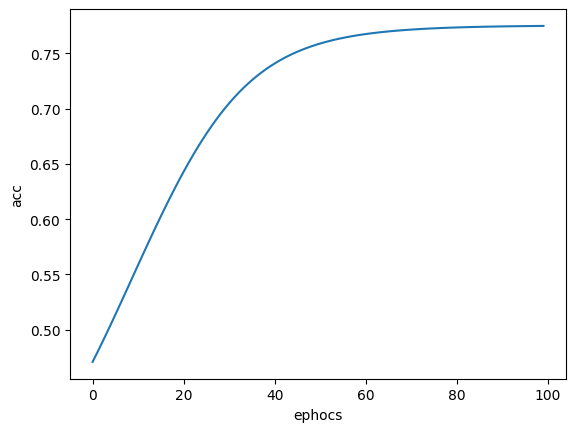

In [81]:
# visualize accuracy
plt.plot(acc)
plt.xlabel('ephocs')
plt.ylabel('acc')
plt.show()

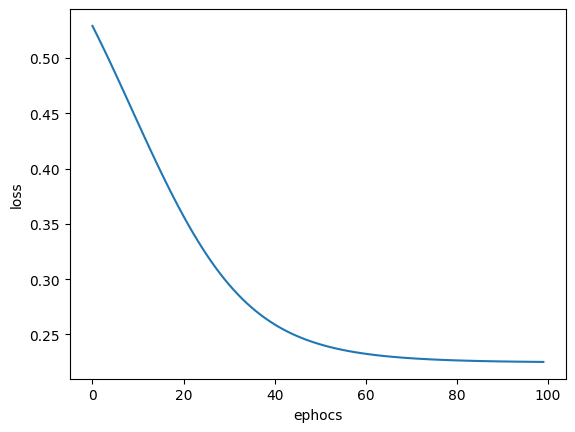

In [82]:
#plot loss
plt.plot(loss)
plt.xlabel('ephocs')
plt.ylabel('loss')
plt.show()

In [83]:
print(w1,'\n\n', w2)

[[ 0.55654813  0.52033213  0.11930305  0.5134007   0.34062069]
 [ 0.85127095  0.16990724  0.44569112  0.12084332  0.93153561]
 [ 0.25177606  0.36023409  0.07947534  0.96855141  0.60776527]
 [ 0.60918711  0.38480045  0.81030772  0.01475564  0.65687416]
 [ 0.42003329  0.42195956  0.79490552  0.7056394   0.50855408]
 [ 0.66440601  0.03493818  0.16641852  0.30966654  0.46284659]
 [ 0.26350856  0.38014126  0.63496502  0.59451287  0.9703212 ]
 [ 0.49703751  0.95983978  0.77796474  0.91149266  0.8907381 ]
 [ 0.851636    0.37297959  0.59548678  0.01070745  0.32258267]
 [ 0.96614141  0.35427619  0.98503161  0.59250783  0.93481777]
 [ 0.63098481  0.77450341  0.21690582  0.57059915  0.86409736]
 [ 0.22897793  0.11223665  0.07024372  0.29940986  0.20802614]
 [ 0.68135481  0.37768553  0.38910162  0.44459429  0.9459852 ]
 [-0.00150199  0.95471348  0.52310482  0.04784369  0.90195068]
 [ 0.79350717  0.87584473  0.52990378  0.76277124  0.16594319]
 [ 0.55534288  0.83833774  0.03282338  0.11705469  0.87

 Image is of letter A 


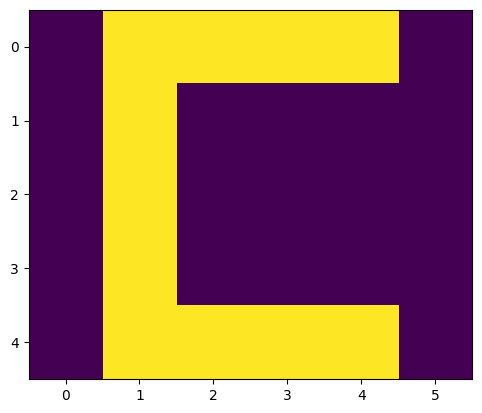

In [84]:
predict(x[2],w1,w2)

 Image is of letter A 


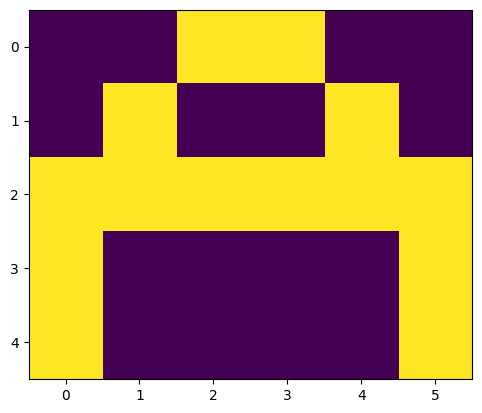

In [85]:
predict(x[0],w1,w2)
